### IT24100164_preprocessing_missing_values - Member 01

### Import Libraries

In [3]:
# Data handling
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load Dataset

In [8]:
# Load dataset 
df = pd.read_csv("data/train.csv")

# Check shape and first 5 rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (114000, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Step 2: Check Missing Values (Before Handling)

In [11]:
# Count missing values
missing_before = df.isnull().sum()
print("Missing values BEFORE cleaning:\n", missing_before)

# Percentage
missing_percent_before = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values BEFORE cleaning:\n", missing_percent_before)


Missing values BEFORE cleaning:
 Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Percentage of missing values BEFORE cleaning:
 Unnamed: 0          0.000000
track_id            0.000000
artists             0.000877
album_name          0.000877
track_name          0.000877
popularity          0.000000
duration_ms         0.000000
explicit            0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumen

### Step 3: Visualize Missing Values (Before Handling)

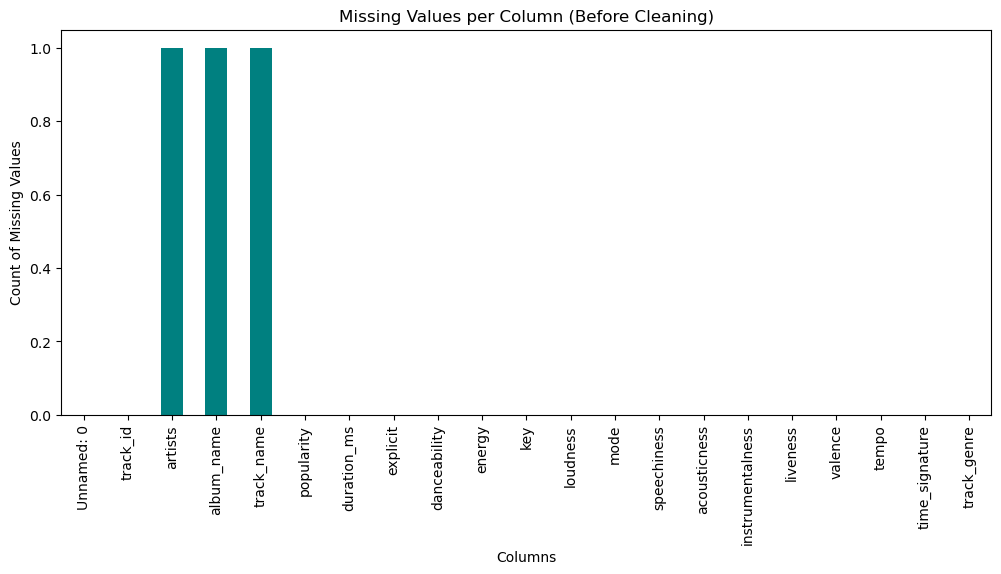

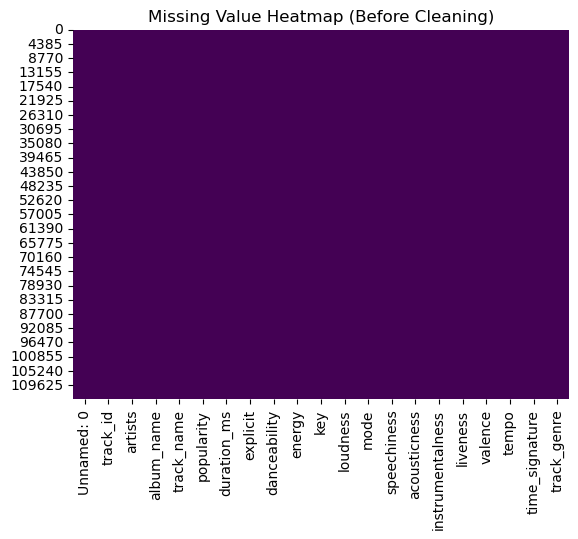

In [14]:
# Bar chart
missing_before.plot(kind="bar", figsize=(12,5), color="teal")
plt.title("Missing Values per Column (Before Cleaning)")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()

# Heatmap
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap (Before Cleaning)")
plt.show()


### Step 4: Handle Missing Values

In [27]:
# Numeric features → fill with median
df['popularity'] = df['popularity'].fillna(df['popularity'].median())
df['duration_ms'] = df['duration_ms'].fillna(df['duration_ms'].median())
df['tempo'] = df['tempo'].fillna(df['tempo'].median())
df['loudness'] = df['loudness'].fillna(df['loudness'].median())

# Categorical/discrete features → fill with mode
df['key'] = df['key'].fillna(df['key'].mode()[0])
df['mode'] = df['mode'].fillna(df['mode'].mode()[0])
df['time_signature'] = df['time_signature'].fillna(df['time_signature'].mode()[0])

# Drop rows where target or ID/text columns are missing
df = df.dropna(subset=['track_genre', 'track_id', 'track_name', 'album_name', 'artists'])


### Step 5: Verify Cleaning (After Handling)

In [30]:
missing_after = df.isnull().sum()
print("Missing values AFTER cleaning:\n", missing_after)

missing_percent_after = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values AFTER cleaning:\n", missing_percent_after)


Missing values AFTER cleaning:
 Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Percentage of missing values AFTER cleaning:
 Unnamed: 0          0.0
track_id            0.0
artists             0.0
album_name          0.0
track_name          0.0
popularity          0.0
duration_ms         0.0
explicit            0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo         

### Step 6: Visualize Missing Values (After Handling)

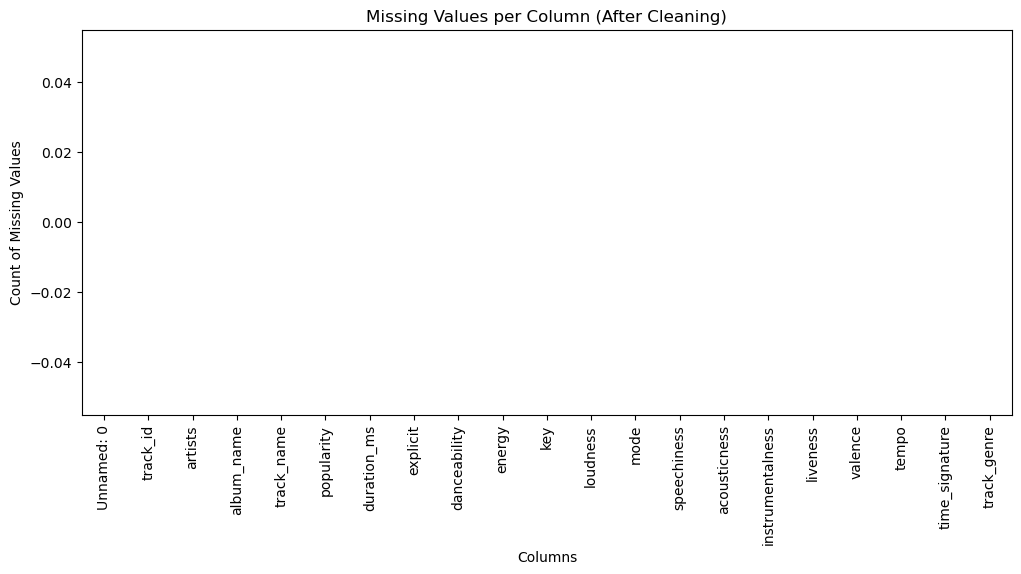

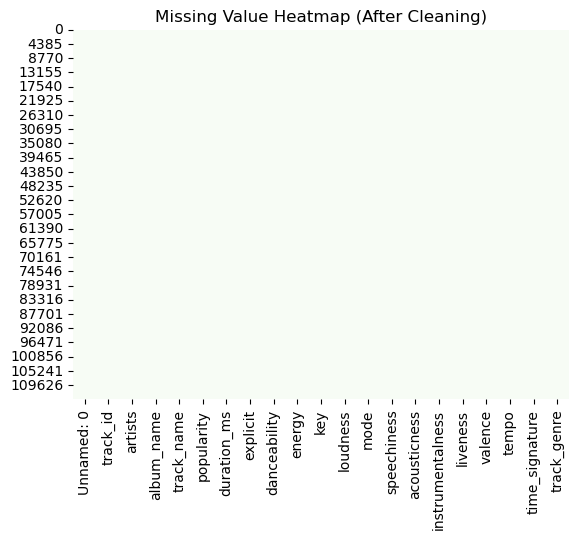

In [33]:
# Bar chart
missing_after.plot(kind="bar", figsize=(12,5), color="green")
plt.title("Missing Values per Column (After Cleaning)")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()

# Heatmap
sns.heatmap(df.isnull(), cbar=False, cmap="Greens")
plt.title("Missing Value Heatmap (After Cleaning)")
plt.show()


### Step 7: Save Cleaned Dataset

In [36]:
df.to_csv("data/spotify_tracks_clean.csv", index=False)
print("Cleaned dataset saved as data/spotify_tracks_clean.csv")


Cleaned dataset saved as data/spotify_tracks_clean.csv
